In [44]:
import pandas as pd
import keras
from keras.datasets import imdb
from keras import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split
from keras.preprocessing import image

In [24]:
datapath =  "C:/University of Chicago/Deep Learning and Image Recognition/Project/all/train.csv"

In [25]:
traindata = pd.read_csv(datapath)

In [26]:
traindata.head()

,Emotion,Pixels
0,3,221 240 251 254 255 255 255 255 255 255 255 25...
1,6,100 107 108 104 103 113 117 115 120 130 138 14...
2,4,35 50 56 57 63 76 74 79 85 86 105 133 145 152 ...
3,6,119 124 129 135 136 140 142 149 159 156 163 16...
4,2,160 173 186 194 188 185 175 162 153 143 135 12...


In [27]:
labels = traindata['Emotion']

In [28]:
traindata = traindata.drop(columns = ["Emotion"])

In [29]:
traindata = traindata['Pixels'].str.split(' ')

In [30]:
traindata = traindata.apply(lambda x:np.array([int(number) for number in x]).reshape((48,48)))

In [35]:
x_train, x_test, y_train, y_test = train_test_split(traindata, labels,random_state=42, test_size=0.3)

In [39]:
x_train = np.array(list(x_train))
x_test = np.array(list(x_test))
y_train = np.array(list(y_train))
y_test = np.array(list(y_test))# input image dimensions


In [54]:
img_rows, img_cols = 48, 48
num_classes = 7
batch_size = 32
epochs = 20

In [47]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (2924, 48, 48, 1)
2924 train samples
1254 test samples


In [64]:
#basic model 
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [65]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 20, 32)        18464     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 18, 18, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 64)          0         
__________

In [67]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)

Train on 2339 samples, validate on 585 samples
Epoch 1/20
2339/2339 [==============================] - 96s 41ms/step - loss: 1.8901 - acc: 0.2698 - val_loss: 1.9152 - val_acc: 0.2872
Epoch 2/20
2339/2339 [==============================] - 98s 42ms/step - loss: 1.8757 - acc: 0.2869 - val_loss: 1.8851 - val_acc: 0.2872
Epoch 3/20
2339/2339 [==============================] - 99s 42ms/step - loss: 1.8698 - acc: 0.2873 - val_loss: 1.8812 - val_acc: 0.2872
Epoch 4/20
2339/2339 [==============================] - 111s 48ms/step - loss: 1.8684 - acc: 0.2873 - val_loss: 1.8757 - val_acc: 0.2872
Epoch 5/20
2339/2339 [==============================] - 105s 45ms/step - loss: 1.8733 - acc: 0.2873 - val_loss: 1.8764 - val_acc: 0.2872
Epoch 6/20
2339/2339 [==============================] - 99s 42ms/step - loss: 1.8694 - acc: 0.2873 - val_loss: 1.8780 - val_acc: 0.2872
Epoch 7/20
2339/2339 [==============================] - 100s 43ms/step - loss: 1.8697 - acc: 0.2873 - val_loss: 1.8666 - val_acc: 0.287

In [68]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score)

Test loss: [1.8536620552650098, 0.2886762360684229]


Text(0.5, 1.0, 'Loss Curves')

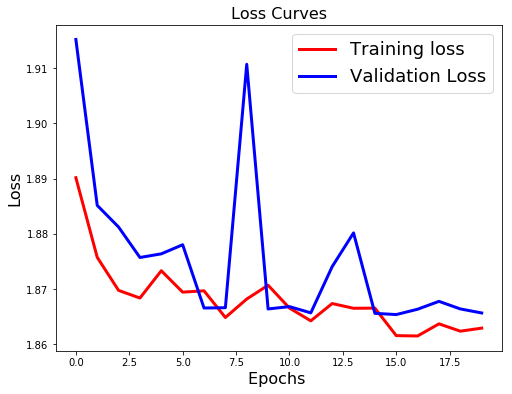

In [69]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [71]:
#model from CIFAR
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))


In [72]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [73]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
dropout_13 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_14 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 64)        36928     
__________

In [74]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)

Train on 2339 samples, validate on 585 samples
Epoch 1/20
2339/2339 [==============================] - 119s 51ms/step - loss: 1.8879 - acc: 0.2788 - val_loss: 1.8750 - val_acc: 0.2872
Epoch 2/20
2339/2339 [==============================] - 122s 52ms/step - loss: 1.8664 - acc: 0.2873 - val_loss: 1.8659 - val_acc: 0.2872
Epoch 3/20
2339/2339 [==============================] - 121s 52ms/step - loss: 1.8666 - acc: 0.2873 - val_loss: 1.8666 - val_acc: 0.2872
Epoch 4/20
2339/2339 [==============================] - 119s 51ms/step - loss: 1.8657 - acc: 0.2873 - val_loss: 1.8722 - val_acc: 0.2872
Epoch 5/20
2339/2339 [==============================] - 113s 48ms/step - loss: 1.8655 - acc: 0.2873 - val_loss: 1.8654 - val_acc: 0.2872
Epoch 6/20
2339/2339 [==============================] - 113s 48ms/step - loss: 1.8637 - acc: 0.2873 - val_loss: 1.8669 - val_acc: 0.2872
Epoch 7/20
2339/2339 [==============================] - 109s 47ms/step - loss: 1.8627 - acc: 0.2873 - val_loss: 1.8690 - val_acc: 0

In [75]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score)

Test loss: [1.8525960717284888, 0.2886762360684229]


Text(0.5, 1.0, 'Loss Curves')

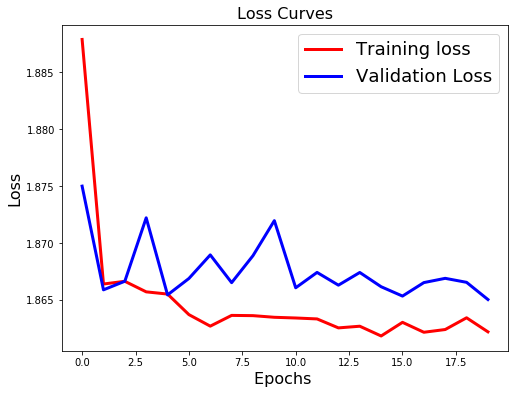

In [76]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [81]:
#running the model with the whole training dataset originally provided

traintotal = np.concatenate((x_train,x_test),axis=0)
labelstotal = np.concatenate((y_train, y_test),axis=0)

In [82]:
history = model.fit(traintotal, labelstotal,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)

Train on 3342 samples, validate on 836 samples
Epoch 1/20
3342/3342 [==============================] - 171s 51ms/step - loss: 1.8589 - acc: 0.2873 - val_loss: 1.8632 - val_acc: 0.2895
Epoch 2/20
3342/3342 [==============================] - 187s 56ms/step - loss: 1.8595 - acc: 0.2873 - val_loss: 1.8657 - val_acc: 0.2895
Epoch 3/20
3342/3342 [==============================] - 175s 52ms/step - loss: 1.8585 - acc: 0.2873 - val_loss: 1.8660 - val_acc: 0.2895
Epoch 4/20
3342/3342 [==============================] - 176s 53ms/step - loss: 1.8594 - acc: 0.2873 - val_loss: 1.8641 - val_acc: 0.2895
Epoch 5/20
3342/3342 [==============================] - 172s 51ms/step - loss: 1.8601 - acc: 0.2873 - val_loss: 1.8640 - val_acc: 0.2895
Epoch 6/20
3342/3342 [==============================] - 180s 54ms/step - loss: 1.8597 - acc: 0.2873 - val_loss: 1.8657 - val_acc: 0.2895
Epoch 7/20
3342/3342 [==============================] - 171s 51ms/step - loss: 1.8587 - acc: 0.2873 - val_loss: 1.8662 - val_acc: 0